In [48]:
#Import Libraries
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Filter out warnings
import warnings
warnings.filterwarnings('ignore')

In [40]:
#Create a file path
Net_generation = Path("Resources/Net_generation_United_States_all_sectors_annual.csv")

#Read in the data
Net = pd.read_csv(Net_generation)
Net.head()

,Year,wind thousand megawatthours,coal thousand megawatthours,petroleum liquids thousand megawatthours,petroleum coke thousand megawatthours,natural gas thousand megawatthours,other gases thousand megawatthours,nuclear thousand megawatthours,conventional hydroelectric thousand megawatthours,all utility-scale solar thousand megawatthours,geothermal thousand megawatthours,wood and wood-derived fuels thousand megawatthours,other biomass thousand megawatthours,hydro-electric pumped storage thousand megawatthours,other thousand megawatthours,small-scale solar photovoltaic thousand megawatthours
0,2023,425235.4024,675263.6246,11593.62650,4878.03130,1802062.498,11450.81255,775347.1510,239854.6187,164501.57470,16461.76454,31438.92214,16024.91956,-5896.536,9954.76608,73618.88030
1,2022,434297.3582,831511.6121,15805.38430,7125.85731,1687066.716,11722.29001,771537.1765,254788.6671,143796.90430,16086.92900,35463.56744,16383.40823,-6027.858,11114.22024,61282.24775
2,2021,378196.7748,897998.7599,11662.56214,7510.64790,1579189.987,11397.23724,779644.5950,251584.8424,115258.24830,15975.12700,36462.67263,17789.55298,-5111.684,12140.06612,49164.20156
3,2020,337938.0490,773392.8971,9661.69285,7679.32228,1626789.640,11818.47797,789878.8630,285273.8948,89198.71512,15889.69700,36218.94295,18492.67346,-5321.205,12855.18509,41522.37953
4,2019,295882.4835,964956.8115,11522.05169,6818.69098,1588532.839,12591.09423,809409.2620,287873.7305,71936.82224,15472.71700,38543.38211,18963.57113,-5260.744,13331.16707,34957.44723


In [42]:
#Rename Columns for cleaner data
Net = Net.rename(columns = {'wind thousand megawatthours': 'Wind',
                            'coal thousand megawatthours': 'Coal',
                            'petroleum liquids thousand megawatthours': 'Petroleum Liquids',
                            'petroleum coke thousand megawatthours': 'Petroleum Coke',
                            'natural gas thousand megawatthours': 'Natural Gas',
                            'other gases thousand megawatthours': 'Other Gases',
                            'nuclear thousand megawatthours': 'Nuclear',
                            'conventional hydroelectric thousand megawatthours': 'Conventional Hydroelectric',
                            'all utility-scale solar thousand megawatthours': 'Utility Scale Solar',
                            'geothermal thousand megawatthours': 'Geothermal',
                            'wood and wood-derived fuels thousand megawatthours': 'Wood/Wood Derived',
                            'other biomass thousand megawatthours': 'Other Biomass',
                            'hydro-electric pumped storage thousand megawatthours': 'Pumped Storage Hydroelectric',
                            'other thousand megawatthours': 'Other',
                            'small-scale solar photovoltaic thousand megawatthours': 'Small Scale Solar'
                           }
                )

#Display new datafram
Net.head()

,Year,Wind,Coal,Petroleum Liquids,Petroleum Coke,Natural Gas,Other Gases,Nuclear,Conventional Hydroelectric,Utility Scale Solar,Geothermal,Wood/Wood Derived,Other Biomass,Pumped Storage Hydroelectric,Other,Small Scale Solar
0,2023,425235.4024,675263.6246,11593.62650,4878.03130,1802062.498,11450.81255,775347.1510,239854.6187,164501.57470,16461.76454,31438.92214,16024.91956,-5896.536,9954.76608,73618.88030
1,2022,434297.3582,831511.6121,15805.38430,7125.85731,1687066.716,11722.29001,771537.1765,254788.6671,143796.90430,16086.92900,35463.56744,16383.40823,-6027.858,11114.22024,61282.24775
2,2021,378196.7748,897998.7599,11662.56214,7510.64790,1579189.987,11397.23724,779644.5950,251584.8424,115258.24830,15975.12700,36462.67263,17789.55298,-5111.684,12140.06612,49164.20156
3,2020,337938.0490,773392.8971,9661.69285,7679.32228,1626789.640,11818.47797,789878.8630,285273.8948,89198.71512,15889.69700,36218.94295,18492.67346,-5321.205,12855.18509,41522.37953
4,2019,295882.4835,964956.8115,11522.05169,6818.69098,1588532.839,12591.09423,809409.2620,287873.7305,71936.82224,15472.71700,38543.38211,18963.57113,-5260.744,13331.16707,34957.44723


In [52]:
#Extract just the 2022 data. This is so that the data is consistent with the other group members.
data_2022 = Net[Net['Year'] ==2022]

#Drop the year column as it isn't needed in the bar graph
data_2022.drop(columns=['Year'], inplace=True)

data_2022

,Wind,Coal,Petroleum Liquids,Petroleum Coke,Natural Gas,Other Gases,Nuclear,Conventional Hydroelectric,Utility Scale Solar,Geothermal,Wood/Wood Derived,Other Biomass,Pumped Storage Hydroelectric,Other,Small Scale Solar
1,434297.3582,831511.6121,15805.3843,7125.85731,1687066.716,11722.29001,771537.1765,254788.6671,143796.9043,16086.929,35463.56744,16383.40823,-6027.858,11114.22024,61282.24775


In [54]:
#Looking through the data, Pumped Storage Hydroelectric has negative values, remove it as well.
data_2022.drop(columns=['Pumped Storage Hydroelectric'], inplace=True)

data_2022

,Wind,Coal,Petroleum Liquids,Petroleum Coke,Natural Gas,Other Gases,Nuclear,Conventional Hydroelectric,Utility Scale Solar,Geothermal,Wood/Wood Derived,Other Biomass,Other,Small Scale Solar
1,434297.3582,831511.6121,15805.3843,7125.85731,1687066.716,11722.29001,771537.1765,254788.6671,143796.9043,16086.929,35463.56744,16383.40823,11114.22024,61282.24775


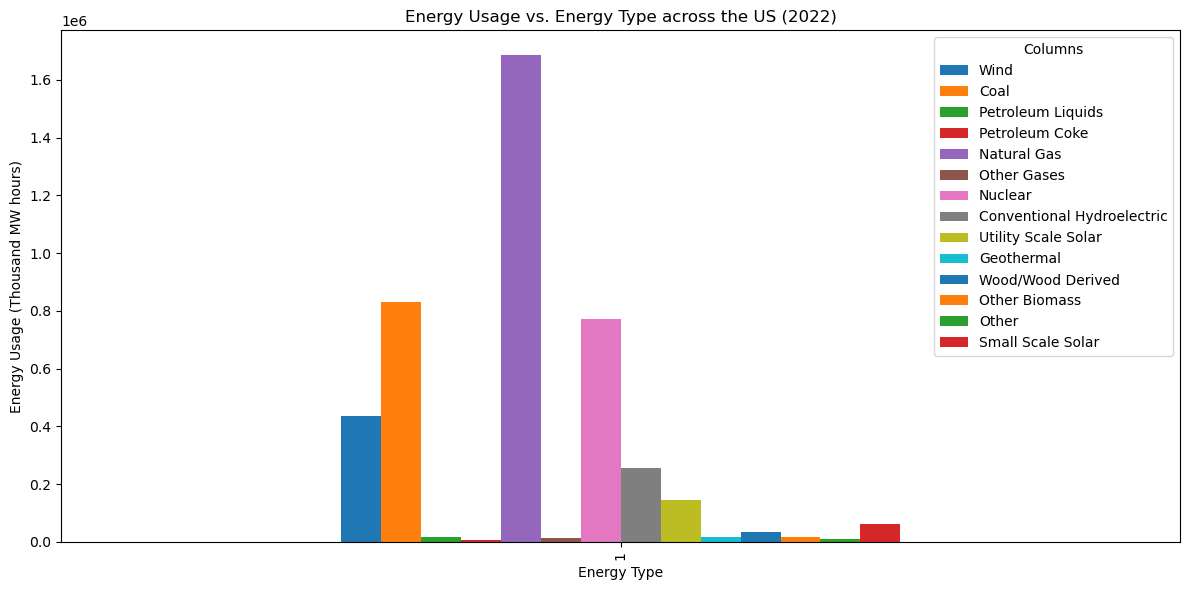

In [64]:
#Construct the Bar Graph
data_2022.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Energy Type')
plt.ylabel('Energy Usage (Thousand MW hours)')
plt.title('Energy Usage vs. Energy Type across the US (2022)')
plt.legend(title='Columns', bbox_to_anchor=(1, 1))
plt.tight_layout()


plt.savefig("Images/US_Energy_Usage.png")